                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            
####                 Отчет по лабораторной работе "Численное решение систем линейных уравнений, численное интегрирование"

                                              
                                                 Вариант 19
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                          Выполнила: Широкова Анастасия, 430 гр.
                                          
                                                                          Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.

##  Содержание
1. Задача
2. Цели работы
3. Используемые алгоритмы
4. Программа
5. Анализ результатов 


###   1) Задача.
1. Выбрать свой вариант системы (номер варианта остается с предыдущей лабораторной работы). Кроме самой системы в варианте должны быть указаны:
 * число уравнений системы
 * требуемый метод/методы решения системы
 * необходимая относительная точность решения системы
 * требуемый метод вычисления интеграла
 * необходимая относительная точность вычисления интеграла (если не указана, то брать — 0,01).

2.  Вычислить определенный интеграл двумя методами
 * Заданным методом
 * С помощью функции numpy.trapz(…), графически провести сравнение с результатами предыдущего метода. Разницу объяснить.

3. Построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования.

4. Решить систему заданным методом 
 * Для 1000 уравнений
 * Для 10000 уравнений

5. Построить график решения X(i), а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

6. Решить систему с помощью функции numpy.linalg.solve(…). Результат графически сравнить с решением, полученным в пункте 4. Разницу объяснить.

###   2) Цель работы:
* Освоить методы численного интегрирования. Вычислить определенный интеграл с использованием **формулы Буля** с относительной точностью **0,01**
* Научиться численно решать системы линейных уравнений. Решение систему из 1000 и 10000 уравнений **методом релаксации**  с относительной точностью **0,01**.

### Дана система:
$$x_1=1$$
$$x_{i-1}-\frac{4+sin(i+1)}{i^2}x_i+x_{i+1}=-4+\int_0^1\frac{cos(3t)}{1+10it^2}\,dt, i=2,3,...,n-1$$
$$x_n=4$$

##   3. Используемые алгоритмы
#### 3.1 Вычисление определенного интеграла методом Буля
Вычисляемый интеграл можно рассматривать как оператор, имеющий областью определения пространство $H_{[a,b]}$, а областью значений пространство $R_1$.
$$A[f]=\int_a^b f(x)\,dx$$
Тогда оператор $А$ можно аппроксимировать последовательностью конечноразмерных операторов $A_n$, имеющих областью определения пространство $R_n$, а областью значений пространство $R_1$
Выбирая в качестве интерполяционного многочлена многочлен Лагранжа, будем иметь:
$$\int_a^b f(x)\,dt=\sum_{k=0}^nC_k^{(n)}f(x_k^{(n)})+R_n[f],$$ где
Kвадратурная формула Ньютона-Котеса:
$$C_k^{(n)}=\int_a^b \prod_{i=0,i\ne k}^n {\frac {x-x_i^{(n)}} {x_k^{(n)}-x_i^{(n)}}} \,dx$$ 
остаточный член:
$$R_n[f]=\frac {f^{(n+1)}(\zeta)} {(n+1)!} \int_a^b\prod_{i=0}^n (x-x_i^{(n)}) \,dx$$ 
                                     **В квадратурной формуле Буля:**
$$\sum_{k=0}^4 C_k^{(4)}f(x_k^{(4)})=\frac {\beta-\alpha}{ 90} (7f(\alpha)+32f(\frac {3\alpha+\beta} 4) + 12f(\frac {\alpha+\beta} 2)+32f(\frac {\alpha+3\beta} 4)+7f(\beta))$$
$$R_4[f]\le max_{x\in [\alpha,\beta]} |f^{(7)}(x)| \frac {8(\alpha-\beta)^7} {945}$$

## 3.2 Решение системы уравнений методом релаксации
Метод релаксации является итерационным. 
Представим матрицу $A$ в виде $A=L+D+R$, где $L$ - нижняя треугольная матрица с нулевыми диагональными элементами, $D$ - диагональная матрица, $R$ - верхняя треугольная матрица
Тогда $$x^{k+1}= t(D+tL)^{-1}((1-t)D-tR)x^k+t(D+tL)^{-1}B$$ где t параметр, причем $0<t<2$

##   4. Программа

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate
import numpy.linalg as lin
%matplotlib inline

График подынтегральной функции


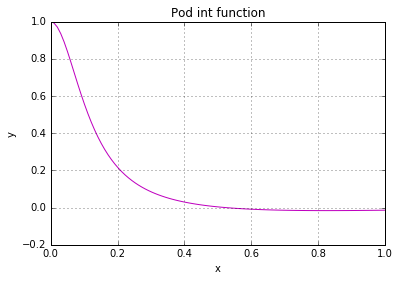

In [2]:
n=1000
a=0; b=1
def f(x,i):
    return math.cos(3*x)/(1+10*i*x**2)
def tra(x):
    return f(x,10000)
xst = np.arange(0,1,0.01)
trap = [tra(l) for l in xst]
t = np.linspace(0,1,100)
z = [f(x,7) for x in t ] 
print ('График подынтегральной функции')
plt.plot(t,z,'m')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Pod int function')
plt.grid()

Зависимость интеграла от номера итерации
Номер интерации:  27
Значение интеграла:  0.004857805800298816
интеграл,вычисленный с помощью trapz: 0.0065007961934


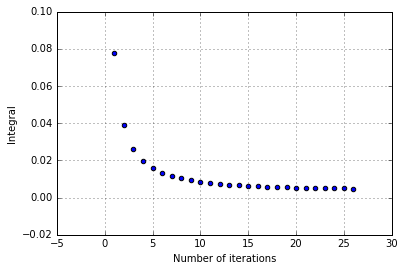

In [4]:
def summ(k,i):
    tz=0
    e=0
    vs=0
    for o in range(0,k):
        tz=o/k
        e+=1/k
        vs+=(e-tz)/90*(7*f(tz,i)+32*f((3*tz+e)/4,i)+12*f((tz+e)/2,i)+32*f((tz+3*e)/4,i)+7*f(e,i))
    return vs    
v=np.arange(1,27,1)
c=[summ(s,10000) for s in v]#введи здесь номер интеграла
print('Зависимость интеграла от номера итерации')
plt.scatter(v,c)
plt.xlabel('Number of iterations')
plt.ylabel('Integral')
plt.title('')
plt.grid()

def integralr(i):
    N=2
    p=summ(1,i)
    while math.fabs((summ(N,i)-summ(N-1,i))/summ(N-1,i))>0.01:
        N=N+1
        p=summ(N-1,i)
    print('Номер интерации: ',N)
    return p    
print ('Значение интеграла: ',integralr(10000))

NTR=np.trapz(trap, x=None, dx=0.01)
print('интеграл,вычисленный с помощью trapz:',NTR)

In [5]:
# Решение системы 1000 уравнений 
# Задание вспомагательных матриц

start = time.time()
n=1000
t=1.2
A=np.zeros((n,n))
A[0,0]=1
A[n-1,n-1]=1
for i in range(1,n-1):
    A[i,i-1]=1
    A[i,i+1]=1
    A[i,i]=-(4+math.sin(i+1)/(i**2))
L=np.zeros((n,n))
D=np.zeros((n,n))
for i in range (0,n):
    D[i,i]=A[i,i]
for i in range(0,n):
    for j in range (0,i):
        L[i,j]=A[i,j]
R=A-D-L
H=(D+t*L)
Hi=t*lin.inv(H)
T1=((1-t)*D-t*R)
T2=lin.inv(H)
Ti=np.dot(T2,T1)
B=np.zeros((n,1))
B[0,0]=1
B[n-1,0]=4
for i in range (1,n-1):
    N=2
    p=summ(1,i)
    while math.fabs((summ(N,i)-summ(N-1,i))/summ(N-1,i))>0.01:
        N=N+1
        p=summ(N-1,i)
    B[i,0]=-4+p
Hb=np.dot(Hi,B)
X0=np.zeros((n,1))
X =np.dot(Ti,X0)+Hb
Norm=[]
konets=0
nor=lin.norm(X-X0)
nor1=lin.norm(X)
norT=lin.norm(Ti)
Norm.append(nor1)
while nor/nor1>0.01:
    X0=X
    X =np.dot(Ti,X0)+Hb
    nor1=lin.norm(X)
    nor=lin.norm(X-X0)
    Norm.append(nor1)
    konets+=1
print (konets)
print ('time: %f' % (time.time() - start), 'sec')

3
time: 3.059054 sec


График X(i)


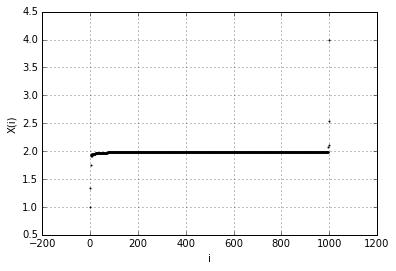

In [6]:

print('График X(i)')
t=np.linspace(0,n,n)
plt.scatter (t,X,s=1)

plt.xlabel('i')
plt.ylabel('X(i)')
plt.title('')
plt.grid()


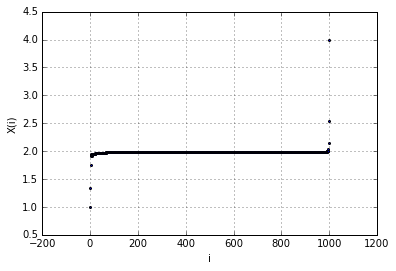

In [8]:
Xpy=lin.solve(A,B)
plt.scatter (t,Xpy,s=4)
plt.xlabel('i')
plt.ylabel('X(i)')
plt.title('')
plt.grid()

Разница решений методом релаксации и встроенной фунцией lin.solve


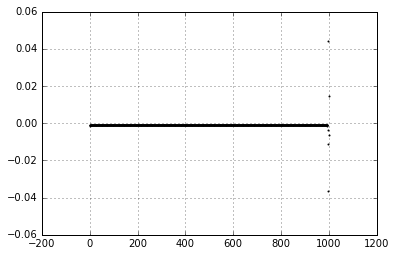

In [11]:
print('Разница решений методом релаксации и встроенной фунцией lin.solve')
plt.scatter (t,X-Xpy,s=1)
plt.grid()

График Norm(i)


[0, 3, 52, 64]

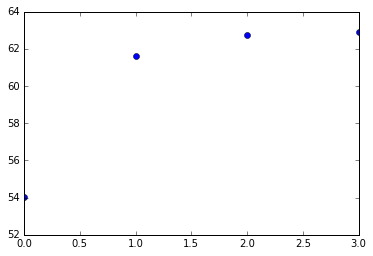

In [12]:
print('График Norm(i)')
plt.plot (Norm,marker="o",ls='')
plt.axis([0, konets, 52,64])

## Результаты:

Номер интерации:  27
Значение интеграла:  0.004857805800298816
Зависимость интеграла от номера итерации
интеграл,вычисленный с помощью trapz: 0.0065007961934


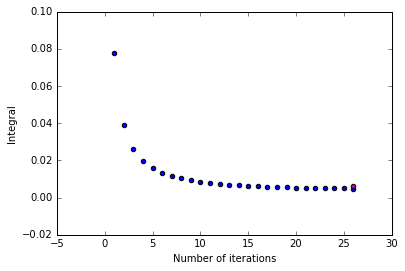

In [13]:
print ('Значение интеграла: ',integralr(10000))
print('Зависимость интеграла от номера итерации')
plt.scatter(v,c)
plt.xlabel('Number of iterations')
plt.ylabel('Integral')
print('интеграл,вычисленный с помощью trapz:',NTR)
plt.scatter(26,NTR,c='m')

##### *Результаты вычисления интеграла методом Буля и с помощью встроенной функции numpy.trapz совпадают в точностью до 3 знака после запятой.Встроенная функция вычисляет интеграл с помощью формулы трапеций, в которой используется интерполяционный многочлен Лагранжа второго порядка, тогда как в формуле Буля интерполяция производилась многочленом четвертого порядка. Метод Буля более точный.*

### Решение системы

##### *Видно, что решение методом релаксации и с помощью встроенной функции совпадают c точностью до третьего знака после запятой.*

Кроме того данная программа может решить систему из 10000 уравнений. 

In [14]:
# Задание вспомагательных матриц

start = time.time()
n=10000
t=1.2
A=np.zeros((n,n))
A[0,0]=1
A[n-1,n-1]=1
for i in range(1,n-1):
    A[i,i-1]=1
    A[i,i+1]=1
    A[i,i]=-(4+math.sin(i+1)/(i**2))
L=np.zeros((n,n))
D=np.zeros((n,n))
for i in range (0,n):
    D[i,i]=A[i,i]
for i in range(0,n):
    for j in range (0,i):
        L[i,j]=A[i,j]
#R=A-D-L
#H=(D+t*L)

#T1=((1-t)*D-t*(A-D-L))
#T2=lin.inv(D+t*L)
Hi=t*lin.inv(D+t*L)
D=np.dot(lin.inv(D+t*L),((1-t)*D-t*(A-D-L)))

A=np.zeros((n,1))
A[0,0]=1
A[n-1,0]=4
for i in range (1,n-1):
    N=2
    p=summ(1,i)
    while math.fabs((summ(N,i)-summ(N-1,i))/summ(N-1,i))>0.01:
        N=N+1
        p=summ(N-1,i)
    A[i,0]=-4+p
Hi=np.dot(Hi,A)
X0=np.zeros((n,1))
X =np.dot(D,X0)+Hi
Norm=[]
konets=0
nor=lin.norm(X-X0)
nor1=lin.norm(X)
norT=lin.norm(D)
Norm.append(nor1)
while nor/nor1>0.01:
    X0=X
    X =np.dot(D,X0)+Hi
    nor1=lin.norm(X)
    nor=lin.norm(X-X0)
    Norm.append(nor1)
    konets+=1
print (konets)
print ('time: %f' % (time.time() - start), 'sec')

3
time: 142.693864 sec
